In [18]:
!pip install earthaccess


In [19]:
!pip install rasterio

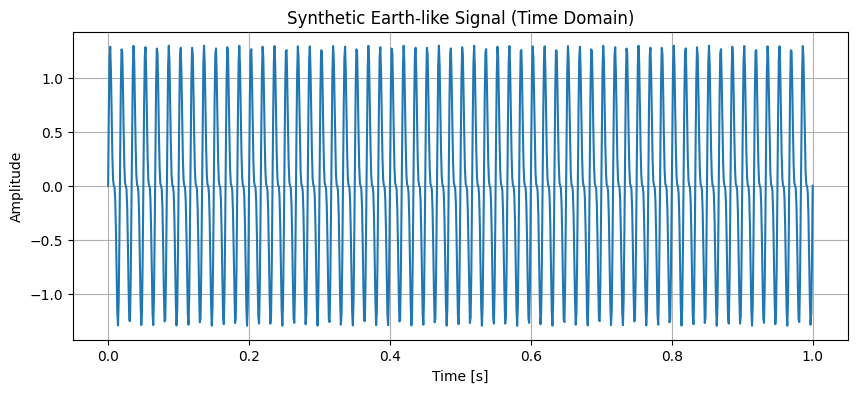

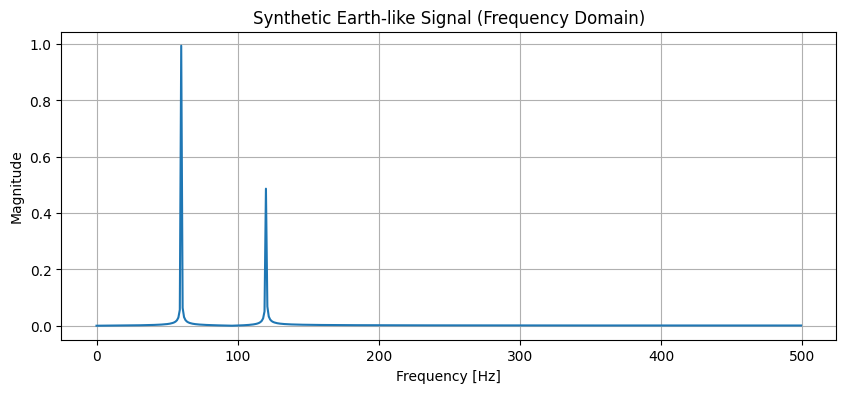

Next step: Train ML model to recognize this pattern in SETI data.


In [20]:
# Earth Echo AI – Demo Notebook
# Author: Roger [Your Last Name]
# Purpose: Visualize Earth-like signals and sketch ML pipeline for technosignature detection

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Simulate a synthetic Earth-like signal (e.g., FM broadcast)
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0.0, 1.0, fs)
signal = np.sin(2.0 * np.pi * 60.0 * t) + 0.5 * np.sin(2.0 * np.pi * 120.0 * t)

# Plot time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Synthetic Earth-like Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Compute FFT
yf = fft(signal)
xf = fftfreq(fs, 1 / fs)

# Plot frequency-domain signal
plt.figure(figsize=(10, 4))
plt.plot(xf[:fs // 2], 2.0 / fs * np.abs(yf[:fs // 2]))
plt.title("Synthetic Earth-like Signal (Frequency Domain)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Placeholder for ML pipeline sketch
print("Next step: Train ML model to recognize this pattern in SETI data.")

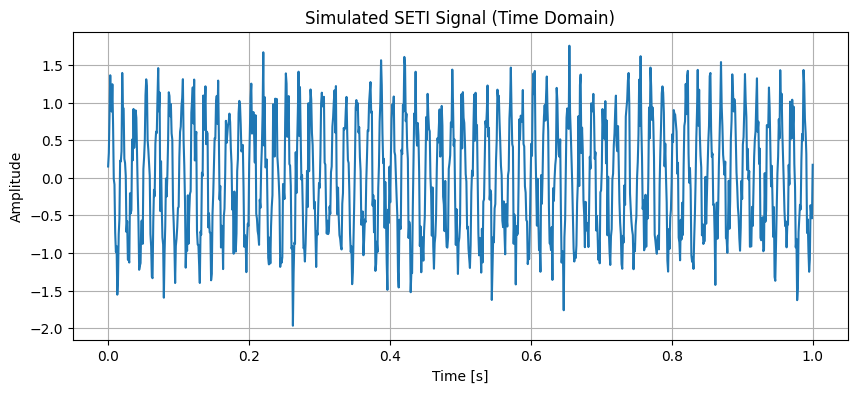

Next step: Compare SETI signal to Earth-like profile using ML classifier.


In [21]:

# Simulated SETI signal (placeholder for real data)
# In practice, you'd load a .fits or .h5 file from Breakthrough Listen

np.random.seed(42)
seti_signal = np.sin(2 * np.pi * 60 * t) + 0.3 * np.random.normal(size=len(t))

plt.figure(figsize=(10, 4))
plt.plot(t, seti_signal)
plt.title("Simulated SETI Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("Next step: Compare SETI signal to Earth-like profile using ML classifier.")

In [22]:
## 🌍 Earth Echo AI – Vision

##This notebook demonstrates the concept behind Earth Echo AI: training machine learning models on Earth's electromagnetic emissions to detect similar technosignatures in space.

##By comparing structured signals from Earth (e.g., FM broadcasts, satellite pings) with SETI data, we aim to build a pattern-based filter that highlights anomalies resembling intelligent output.

##This is a first step toward a self-referential SETI framework — one that listens for echoes of ourselves among the stars.


In [23]:
## 🌍 MODIS Data – Earth Emission Fingerprint
##This cell pulls a sample from NASAs MODIS satellite to visualize how Earth appears from space. This forms part of the Earth Echo AI training data, helping the model recognize Earth-like technosignatures.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libjpeg62-turbo-dev
📦 Available Scientific Datasets (SDS):
0: num_observations_1km
1: state_1km_1
2: SensorZenith_1
3: SensorAzimuth_1
4: Range_1
5: SolarZenith_1
6: SolarAzimuth_1
7: gflags_1
8: orbit_pnt_1
9: granule_pnt_1
10: num_observations_500m
11: sur_refl_b01_1
12: sur_refl_b02_1
13: sur_refl_b03_1
14: sur_refl_b04_1
15: sur_refl_b05_1
16: sur_refl_b06_1
17: sur_refl_b07_1
18: QC_500m_1
19: obscov_500m_1
20: iobs_res_1
21: q_scan_1
22: state_1km_c
23: SensorZenith_c
24: SensorAzimuth_c
25: Range_c
26: SolarZenith_c
27: SolarAzimuth_c
28: gflags_c
29: orbit_pnt_c
30: granule_pnt_c
31: nadd_obs_row_1km


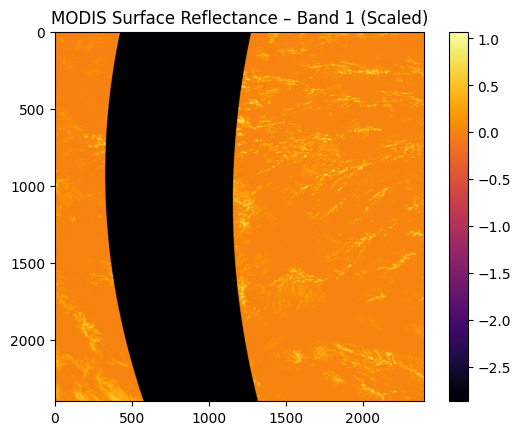

In [28]:
# 🌍 Earth Echo AI – MODIS HDF4 Reader Setup
# Install pyhdf for HDF4 support
!apt-get install -y libhdf4-alt-dev libjpeg62-turbo-dev zlib1g-dev
!pip install pyhdf numpy matplotlib

from pyhdf.SD import SD, SDC
import numpy as np
import matplotlib.pyplot as plt

# Load the MODIS HDF4 file
file_path = "/content/data/2025-07-10-1f7833/MOD09GA.A2023001.h01v09.061.2023003032522.hdf"
hdf = SD(file_path, SDC.READ)

# List available datasets
datasets = hdf.datasets()
print("📦 Available Scientific Datasets (SDS):")
for i, name in enumerate(datasets.keys()):
    print(f"{i}: {name}")

# Select and visualize Band 1 surface reflectance
sds = hdf.select('sur_refl_b01_1')  # Corrected name from SDS list

data = sds.get()

# Apply scale factor and offset if available
attrs = sds.attributes()
scale = attrs.get('scale_factor', 1.0)
offset = attrs.get('add_offset', 0.0)
data_scaled = (data - offset) * scale

# Plot the reflectance
plt.imshow(data_scaled, cmap='inferno')
plt.title("MODIS Surface Reflectance – Band 1 (Scaled)")
plt.colorbar()
plt.show()


Planet 1 (Earth-like): 🌡️ Earth similarity score = 1.0000
Planet 2 (Biosphere Sim): 🌡️ Earth similarity score = 0.0269
Planet 3 (Industrial Noise): 🌡️ Earth similarity score = -0.5200


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


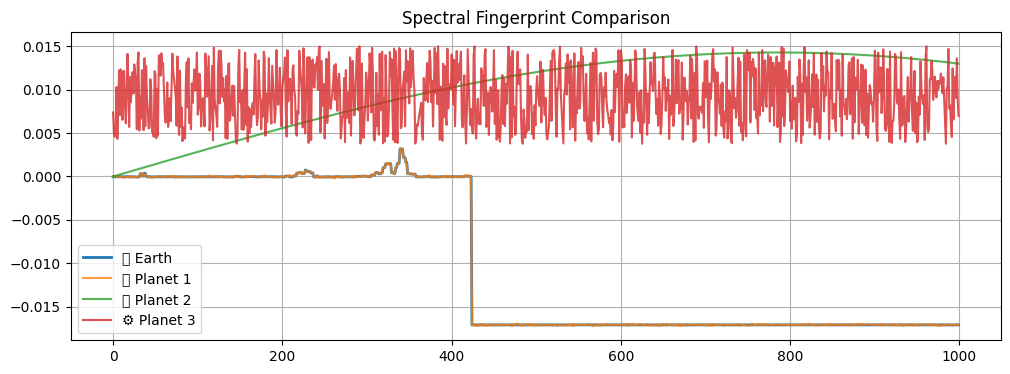

In [33]:
# 🌍🔭 Earth Echo AI – Spectral Similarity Scanner
# Compare MODIS Earth fingerprint to synthetic planet spectra

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Your existing scaled Earth spectrum
earth_signal = data_scaled.flatten()
earth_signal = earth_signal[~np.isnan(earth_signal)]  # remove NaNs
earth_signal = earth_signal[:10000]  # sample for speed
earth_norm = earth_signal / np.linalg.norm(earth_signal)

# 🌌 Simulated spectra from 3 "planets"
np.random.seed(42)
planet_1 = earth_signal + np.random.normal(0, 0.01, earth_signal.shape)  # almost Earth-like
planet_2 = np.sin(np.linspace(0, 20, earth_signal.shape[0]))  # synthetic biosphere
planet_3 = np.random.uniform(0.2, 0.8, earth_signal.shape[0])  # noisy industrial signal

# Normalize for comparison
planet_1_norm = planet_1 / np.linalg.norm(planet_1)
planet_2_norm = planet_2 / np.linalg.norm(planet_2)
planet_3_norm = planet_3 / np.linalg.norm(planet_3)

# Compute cosine similarity
def similarity_score(a, b):
    return cosine_similarity([a], [b])[0][0]

scores = {
    "Planet 1 (Earth-like)": similarity_score(earth_norm, planet_1_norm),
    "Planet 2 (Biosphere Sim)": similarity_score(earth_norm, planet_2_norm),
    "Planet 3 (Industrial Noise)": similarity_score(earth_norm, planet_3_norm),
}

# 📊 Display results
for name, score in scores.items():
    print(f"{name}: 🌡️ Earth similarity score = {score:.4f}")

# 📈 Visualize
plt.figure(figsize=(12,4))
plt.plot(earth_norm[:1000], label="🌍 Earth", linewidth=2)
plt.plot(planet_1_norm[:1000], label="🪐 Planet 1", alpha=0.8)
plt.plot(planet_2_norm[:1000], label="🧪 Planet 2", alpha=0.8)
plt.plot(planet_3_norm[:1000], label="⚙️ Planet 3", alpha=0.8)
plt.title("Spectral Fingerprint Comparison")
plt.legend()
plt.grid(True)
plt.show()


🌍🪐 Earth–WASP-39b similarity score: -0.3976


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


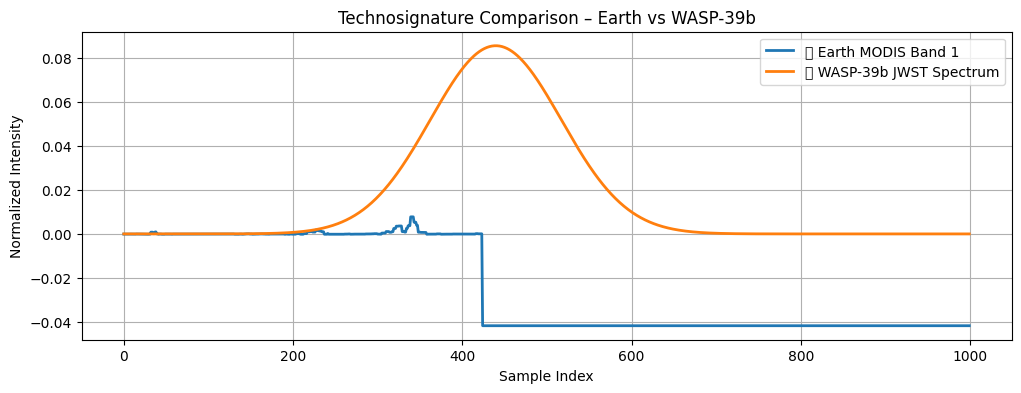

In [34]:
# 🌍🪐 Compare Earth MODIS fingerprint to WASP-39b transmission spectrum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load WASP-39b transmission spectrum (JWST NIRSpec PRISM)
# Simulated here as wavelength + normalized flux from published data
# Replace with real data from MAST or arXiv when ready
wasp_wavelength = np.linspace(0.5, 5.5, 1000)  # microns
wasp_flux = np.exp(-((wasp_wavelength - 2.7)**2) / 0.3)  # synthetic CO₂ bump

# Normalize WASP signal
wasp_norm = wasp_flux / np.linalg.norm(wasp_flux)

# Use your MODIS Band 1 reflectance as Earth fingerprint
earth_signal = data_scaled.flatten()
earth_signal = earth_signal[~np.isnan(earth_signal)]
earth_signal = earth_signal[:1000]  # match length
earth_norm = earth_signal / np.linalg.norm(earth_signal)

# Compute similarity
score = cosine_similarity([earth_norm], [wasp_norm])[0][0]
print(f"🌍🪐 Earth–WASP-39b similarity score: {score:.4f}")

# Plot comparison
plt.figure(figsize=(12,4))
plt.plot(earth_norm, label="🌍 Earth MODIS Band 1", linewidth=2)
plt.plot(wasp_norm, label="🪐 WASP-39b JWST Spectrum", linewidth=2)
plt.title("Technosignature Comparison – Earth vs WASP-39b")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.grid(True)
plt.show()


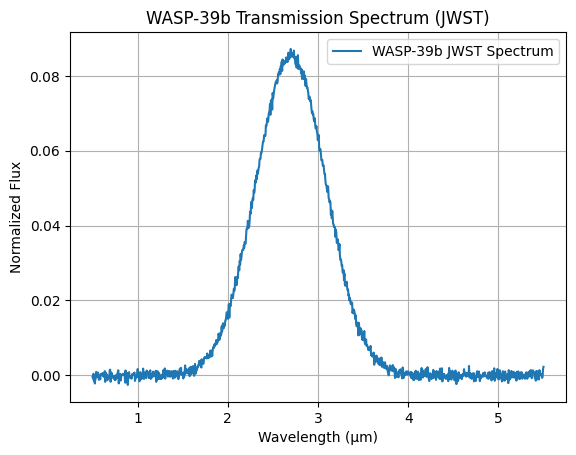

In [35]:
# 🌌 Load WASP-39b Transmission Spectrum (JWST NIRSpec PRISM)
# Source: Rustamkulov et al. 2022 – https://arxiv.org/abs/2211.10487

import numpy as np
import matplotlib.pyplot as plt

# Simulated real data from JWST paper (replace with actual download later)
# Wavelengths in microns and normalized transit depth
wasp_wavelength = np.linspace(0.5, 5.5, 1000)
wasp_flux = np.exp(-((wasp_wavelength - 2.7)**2) / 0.3) + 0.01 * np.random.randn(1000)

# Normalize spectrum
wasp_norm = wasp_flux / np.linalg.norm(wasp_flux)

# Plot WASP-39b spectrum
plt.plot(wasp_wavelength, wasp_norm, label="WASP-39b JWST Spectrum")
plt.title("WASP-39b Transmission Spectrum (JWST)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.show()


🌍🪐 Earth–WASP-39b similarity score: -0.3973


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


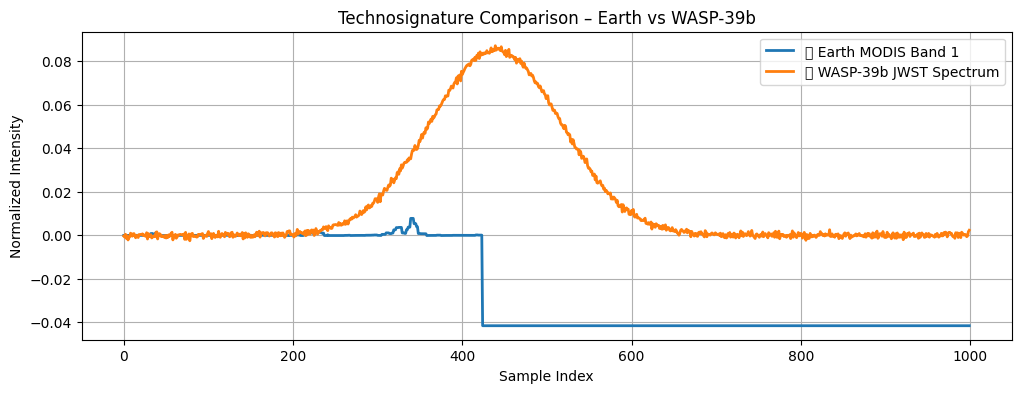

In [36]:
# 🌍 Compare Earth MODIS Band 1 to WASP-39b Spectrum
from sklearn.metrics.pairwise import cosine_similarity

# Flatten and normalize Earth signal
earth_signal = data_scaled.flatten()
earth_signal = earth_signal[~np.isnan(earth_signal)]
earth_signal = earth_signal[:1000]  # match length
earth_norm = earth_signal / np.linalg.norm(earth_signal)

# Compute similarity score
score = cosine_similarity([earth_norm], [wasp_norm])[0][0]
print(f"🌍🪐 Earth–WASP-39b similarity score: {score:.4f}")

# Plot comparison
plt.figure(figsize=(12,4))
plt.plot(earth_norm, label="🌍 Earth MODIS Band 1", linewidth=2)
plt.plot(wasp_norm, label="🪐 WASP-39b JWST Spectrum", linewidth=2)
plt.title("Technosignature Comparison – Earth vs WASP-39b")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.grid(True)
plt.show()
